##Installing dependencies

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##Upload the file

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


##Analyze the dataset

In [3]:
df = df.drop(df.columns[0], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df = df.fillna(df.mean())

In [7]:
df.drop_duplicates()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
df = df[['TV', 'Radio', 'Newspaper', 'Sales']]

In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [11]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1:].values

##Visualize the data

<ipython-input-14-a1e4c7ab88d4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TV'])
<ipython-input-14-a1e4c7ab88d4>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Radio'])
<ipython-input-14-a1e4c7ab88d4>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in s

Text(0.5, 1.0, 'Newspaper')

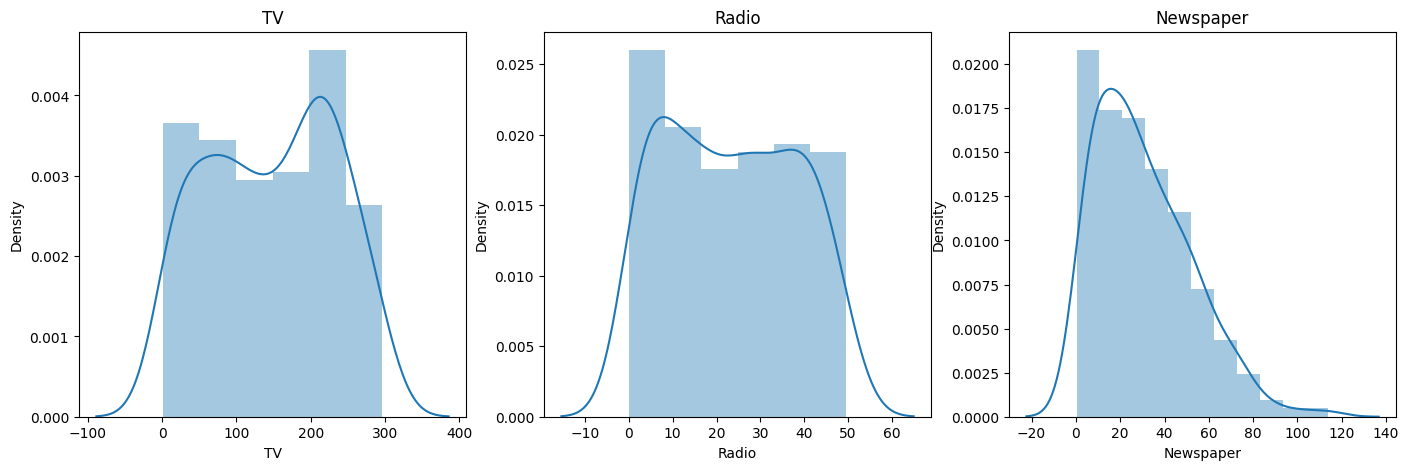

In [14]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(df['TV'])
plt.title('TV')

plt.subplot(1,3,2)
sns.distplot(df['Radio'])
plt.title('Radio')

plt.subplot(1,3,3)
sns.distplot(df['Newspaper'])
plt.title('Newspaper')

##Test Train split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [24]:
y_train_1d = y_train.reshape(-1)

In [25]:
print(len(X_train),len(X_test))

140 60


##Linear Regression

In [26]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
print("R2_score is: ",r2_score(y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))

R2_score is:  0.9211622207064533
Mean Squared Error:  2.1865769773919173


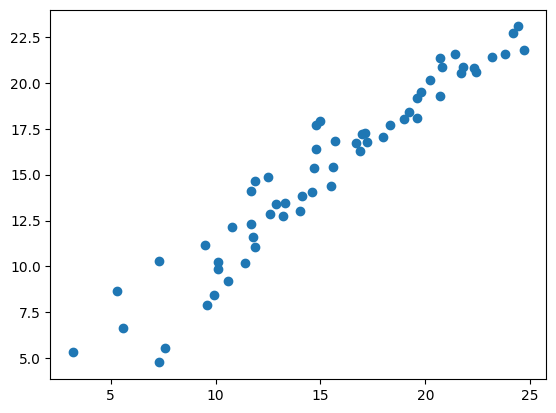

In [27]:
plt.scatter(y_test, y_pred)
plt.show()

## Random Forest Regressor

In [28]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("R2_score is: ",r2_score(y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))

R2_score is:  0.9805152272222635
Mean Squared Error:  0.5404129333333312


<ipython-input-28-08b88648de73>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


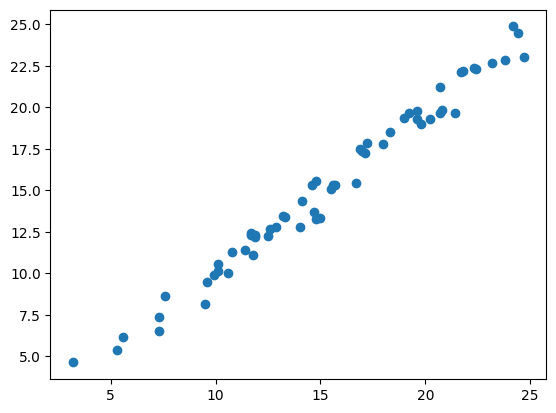

In [29]:
plt.scatter(y_test, y_pred)
plt.show()

##Gradient Boosting Regressor

In [30]:
gb = GradientBoostingRegressor(n_estimators = 100)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("R2_score is: ",r2_score(y_test, y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))

R2_score is:  0.9840298733147064
Mean Squared Error:  0.4429337260512331


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


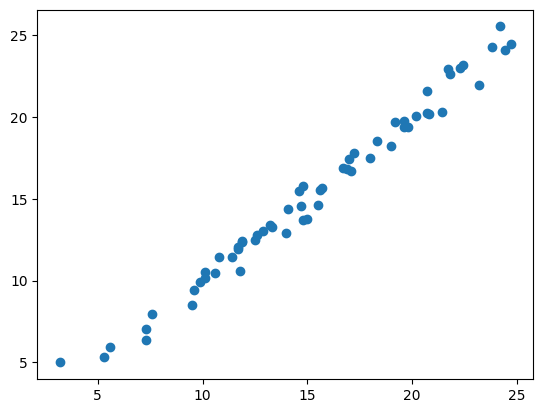

In [31]:
plt.scatter(y_test, y_pred)
plt.show()